In [82]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Train dataset
train_url = 'https://drive.google.com/uc?export=download&id=1c9kqXXxjjOjN7baMv5YXTMBiu66ZVOX3'
df1 = pd.read_csv(train_url)

# Test dataset
test_url = 'https://drive.google.com/uc?export=download&id=1LPXQict984HB3ipad-h4C0F7KEIBax5N'
df2 = pd.read_csv(test_url)
df = pd.concat([df1, df2])

# Check if the data is loaded correctly
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Employee Recognition,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,Married,0,Mid,Medium,89,No,No,No,Excellent,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,Divorced,3,Mid,Low,21,No,No,No,Fair,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,Married,3,Mid,Low,74,No,No,No,Poor,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,Single,2,Mid,Medium,50,Yes,No,No,Good,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,Divorced,0,Senior,Medium,68,No,No,No,Fair,Stayed


In [83]:
df.shape

df = df.drop_duplicates()

df.info()

df.isnull().sum() #Get the sum of all the num values per each attribute

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 14899
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents      7

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [25]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [84]:
df.corr(numeric_only=True)

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Employee ID,1.000000,0.003534,0.000441,0.000331,0.006358,0.008186,-0.004050,-0.003281
Age,0.003534,1.000000,0.537318,-0.001750,0.000672,-0.004586,0.003689,0.236337
Years at Company,0.000441,0.537318,1.000000,-0.005971,0.000939,-0.004835,0.004387,0.442580
Monthly Income,0.000331,-0.001750,-0.005971,1.000000,0.005669,-0.001910,0.001507,-0.006911
Number of Promotions,0.006358,0.000672,0.000939,0.005669,1.000000,-0.006833,-0.001459,0.005150
Distance from Home,0.008186,-0.004586,-0.004835,-0.001910,-0.006833,1.000000,-0.000954,-0.005735
Number of Dependents,-0.004050,0.003689,0.004387,0.001507,-0.001459,-0.000954,1.000000,0.000422
Company Tenure,-0.003281,0.236337,0.442580,-0.006911,0.005150,-0.005735,0.000422,1.000000


## Visualizing the dataset

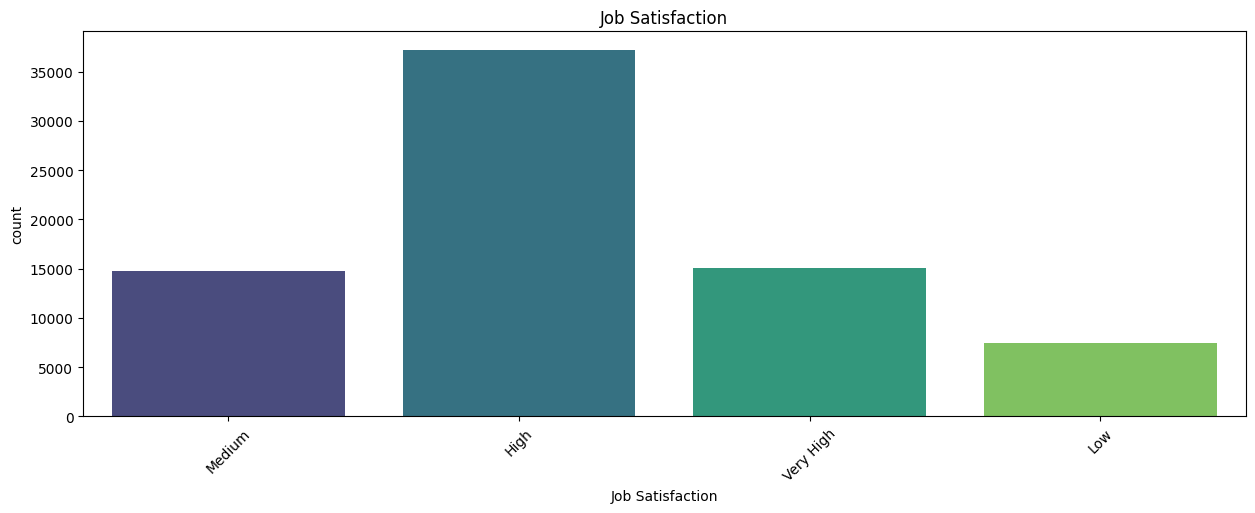

In [ ]:
plt.figure(figsize=(15, 5))

# Use seaborn's color palette to give different colors to each bar
sns.countplot(x=df["Job Satisfaction"], palette='viridis')

plt.xticks(rotation=45)
plt.title("Job Satisfaction")
plt.show()

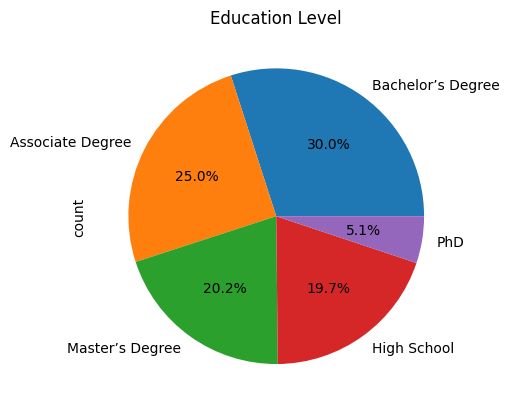

In [ ]:
df["Education Level"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Education Level");

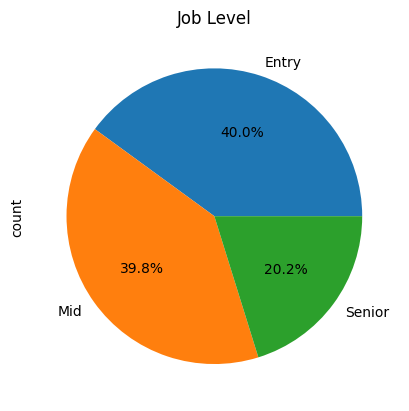

In [ ]:
df["Job Level"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Job Level");

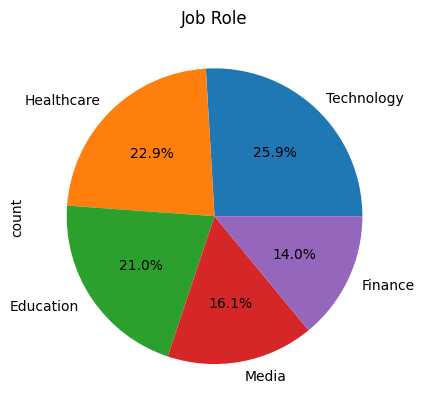

In [ ]:
df["Job Role"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Job Role");

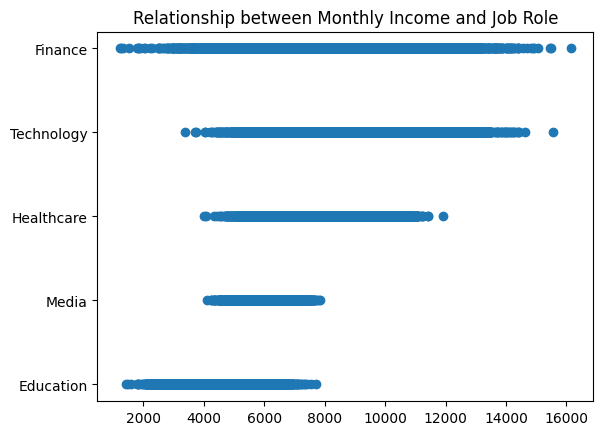

In [ ]:
plt.scatter(df["Monthly Income"], df["Job Role"])
plt.title("Relationship between Monthly Income and Job Role");

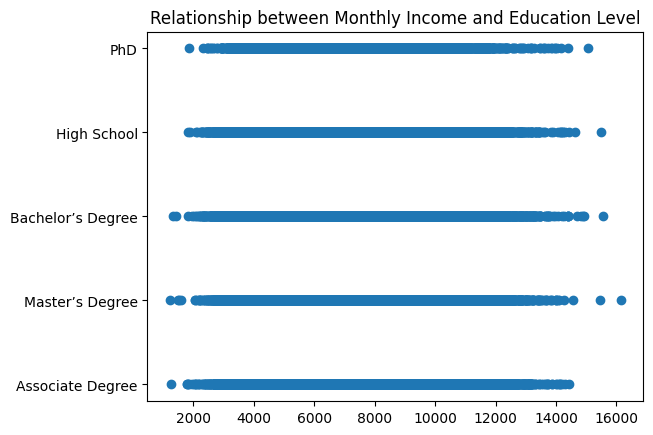

In [ ]:
plt.scatter(df["Monthly Income"], df["Education Level"])
plt.title("Relationship between Monthly Income and Education Level");

# Feature Engineering¶


In [85]:
df = df.drop("Employee ID", axis=1)

# Label Encoding¶


In [86]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding¶


In [87]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [88]:
mms = MinMaxScaler()
df = pd.DataFrame(mms.fit_transform(df), columns=df.columns)

df.head()

,Age,Gender,Years at Company,Monthly Income,Overtime,Distance from Home,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,...,Number of Dependents_5,Number of Dependents_6,Job Level_Mid,Job Level_Senior,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor
0,0.317073,1.0,0.36,0.279032,0.0,0.214286,0.690476,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.000000,0.0,0.06,0.288682,0.0,0.204082,0.150794,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.146341,0.0,0.18,0.464585,0.0,0.102041,0.571429,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.439024,0.0,0.12,0.185150,0.0,0.265306,0.380952,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.926829,1.0,0.80,0.240903,1.0,0.714286,0.523810,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [89]:
x = df.drop("Attrition", axis=1)
y = df[['Attrition']]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)


#Deep Neural Network

In [91]:
model=Sequential()
model.add(Dense(87,activation='relu'))
model.add(Dense(76,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(53,activation='relu'))
model.add(Dense(46,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(x,y,epochs=50,batch_size=32,validation_split=.20,verbose=1)


Epoch 1/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7187 - loss: 0.5255 - val_accuracy: 0.7419 - val_loss: 0.4965
Epoch 2/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7552 - loss: 0.4763 - val_accuracy: 0.7542 - val_loss: 0.4767
Epoch 3/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7551 - loss: 0.4728 - val_accuracy: 0.7526 - val_loss: 0.4758
Epoch 4/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7556 - loss: 0.4693 - val_accuracy: 0.7584 - val_loss: 0.4739
Epoch 5/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7575 - loss: 0.4715 - val_accuracy: 0.7564 - val_loss: 0.4721
Epoch 6/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7561 - loss: 0.4675 - val_accuracy: 0.7566 - val_loss: 0.4733
Epoch 7/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7602 - loss: 0.4604 - val_accuracy: 0.7550 - val_loss: 0.4754
Epoch 8/50
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7614 - loss: 0.4598 

In [95]:
loss,accuracy=model.evaluate(x,y)


2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8608 - loss: 0.2996


In [96]:
accuracy


0.8343042731285095

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(16, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()


history = model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=.20, verbose=1)



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,145 (24.00 KB)

 Trainable params: 5,921 (23.13 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6464 - loss: 0.6515 - val_accuracy: 0.7497 - val_loss: 0.4861
Epoch 2/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7410 - loss: 0.5140 - val_accuracy: 0.7552 - val_loss: 0.4803
Epoch 3/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7441 - loss: 0.5041 - val_accuracy: 0.7516 - val_loss: 0.4802
Epoch 4/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7465 - loss: 0.4978 - val_accuracy: 0.7555 - val_loss: 0.4802
Epoch 5/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7452 - loss: 0.4959 - val_accuracy: 0.7544 - val_loss: 0.4783
Epoch 6/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7422 - loss: 0.4999 - val_accuracy: 0.7542 - val_loss: 0.4789
Epoch 7/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7466 - loss: 0.4948 - val_accuracy: 0.7518 - val_loss: 0.4799
Epoch 8/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7451 - loss: 0.4983 - 

In [105]:
loss, accuracy = model1.evaluate(x_test, y_test)


466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7613 - loss: 0.4701


In [106]:
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.7591274976730347


In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler

model4=Sequential()
model4.add(Dense(87,activation='relu'))
model4.add(Dense(76,activation='relu'))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(53,activation='relu'))
model4.add(Dense(46,activation='relu'))
model4.add(Dense(35,activation='relu'))
model4.add(Dense(24,activation='relu'))
model4.add(Dense(15,activation='relu'))
model4.add(Dense(12,activation='relu'))
model4.add(Dense(9,activation='relu'))
model4.add(Dense(4,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

# EarlyStopping callback with restore_best_weights=True
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model4.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.20, verbose=1, callbacks=[early_stopping])


Epoch 1/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6229 - loss: 0.6371 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 2/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5218 - loss: 0.6923 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 3/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5259 - loss: 0.6919 - val_accuracy: 0.5253 - val_loss: 0.6920
Epoch 4/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5252 - loss: 0.6921 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 5/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5280 - loss: 0.6918 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 6/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5240 - loss: 0.6923 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 7/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5255 - loss: 0.6921 - val_accuracy: 0.5253 - val_loss: 0.6919
Epoch 8/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5265 - loss: 0

In [112]:
loss, accuracy = model1.evaluate(x_test, y_test)

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7613 - loss: 0.4701


In [113]:
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7591274976730347
